# EIT-CEM Quick-Start

In [7]:
import pickle
import seaborn as sns
import sys
sys.path.append('../../FEIT_codes') # Add the parent directory to the path list
from matplotlib.colors import LinearSegmentedColormap
#Importing modules
from FEIT_onefile import *


In [2]:
"Basic Definitions"
r=1            #Circle radius
L=16           #Number of Electrodes
per_cober=0.5  #Percentage of area covered by electrodes
rotate=0       #Rotation

#Return object with angular position of each electrode
ele_pos=electrodes_position(L, per_cober, rotate)
refine_n=8 #Refinement mesh
n_in=8     #Vertex on elec.
n_out=2    #Vertex on gaps (Sometimes it is important.)

mesh_inverse=MyMesh(r, refine_n, n_in, n_out, ele_pos)
mesh_forward=MyMesh(r, refine_n*3, n_in*3, n_out*3, ele_pos)

In [3]:
exp_name="exp2"
expDict = {"$\delta=0.5\%$": "data/{}/NTK_0.5.data".format(exp_name),
           "$\delta=1.0\%$":"data/{}/NTK_1.data".format(exp_name),
           "$\delta=1.5\%$":"data/{}/NTK_1.5.data".format(exp_name),
           "$\delta=2.0\%$":"data/{}/NTK_2.data".format(exp_name),}

dataDict = {}

for name in expDict.keys():
    data = open(expDict[name],'rb')
    mydict = pickle.load(data)
    data.close()
    dataDict[name] = {}
    dataDict[name]['res_vec'] = mydict["results"]["res_vec"]
    dataDict[name]['error_vec'] = mydict["results"]["error_vec"]
    dataDict[name]['noise_level'] = mydict["config"]["noise_level"]
    dataDict[name]['time'] = mydict["results"]["time"]
    dataDict[name]['innerstep_vec'] = mydict["results"]["innerstep_vec"]
    dataDict[name]['gamma_k'] = mydict["results"]["gamma_k"]

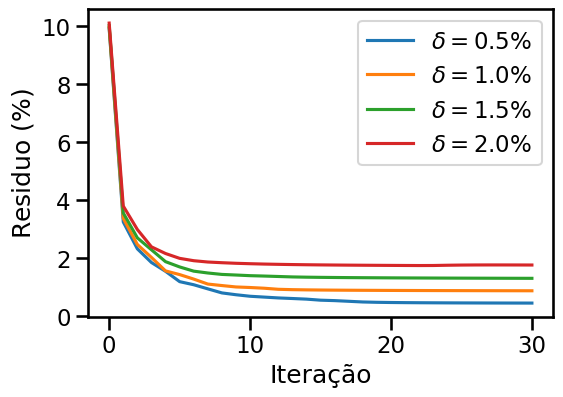

In [4]:
sns.set_context("talk")
#Residue Curve
plt.figure(figsize=(6, 4))
plt.ylabel(r'Residuo $(\%)$');
plt.xlabel('Iteração');
#plt.title('Residue');
max_resvec=1
for key, experiment in dataDict.items():   
    res_vec=experiment["res_vec"]
    max_resvec=max(max_resvec,len(res_vec))
    plt.plot(res_vec, label=key);

    #tau=1.05
    #noise_level=experiment["noise_level"]
    #disc_index=np.argmax(experiment["res_vec"]<tau*noise_level*100)
    #print(res_vec[disc_index])
    #plt.scatter(disc_index, res_vec[disc_index])
    #delta, tau = dataDict[key]["noise_level"], dataDict[key]["tau"]
#plt.plot(np.ones(max_resvec)*tau*delta*100, label=r"$\tau \cdot \delta$");
plt.legend()
plt.savefig("figures/{}/Residue_exp2.png".format(exp_name), bbox_inches='tight', transparent=True)
plt.show()

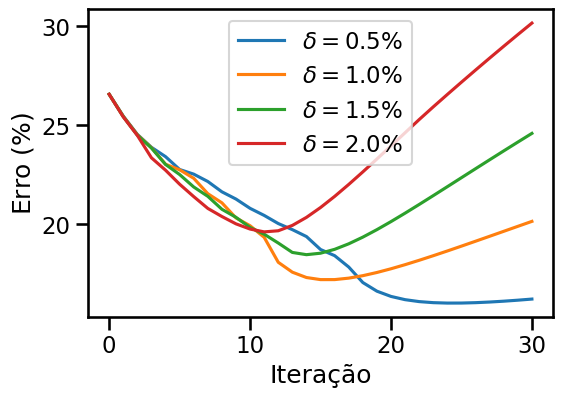

In [5]:
#Error curve
plt.figure(figsize=(6, 4))
plt.ylabel(r'Erro $(\%)$');
plt.xlabel('Iteração');
#plt.title('Error');
for key, experiment in dataDict.items():   
    error_vec=experiment["error_vec"]
    plt.plot(error_vec, label=key);
plt.legend()
plt.savefig("figures/{}/Error_exp2.png".format(exp_name), bbox_inches='tight', transparent=True)
plt.show()

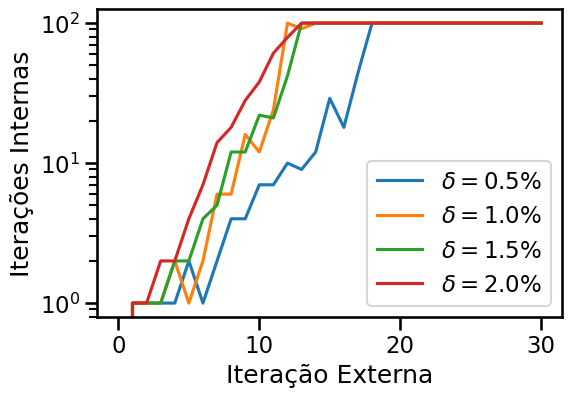

In [6]:
#Error curve
plt.figure(figsize=(6, 4))
plt.ylabel('Iterações Internas');
plt.xlabel('Iteração Externa');
#plt.title('Error');
for key, experiment in dataDict.items():  
    error_vec=experiment["innerstep_vec"]
    plt.plot(error_vec, label=key);
plt.legend()
plt.yscale('log')
plt.savefig("figures/{}/InnerSteps_exp2.png".format(exp_name), bbox_inches='tight', transparent=True)
plt.show()

2.1276129775455392
1.7157936681126926
2.3613642634352647
1.569690743649876
2.5582397272057666
1.4971837270564383
2.7982950470422763
1.5024809115949052


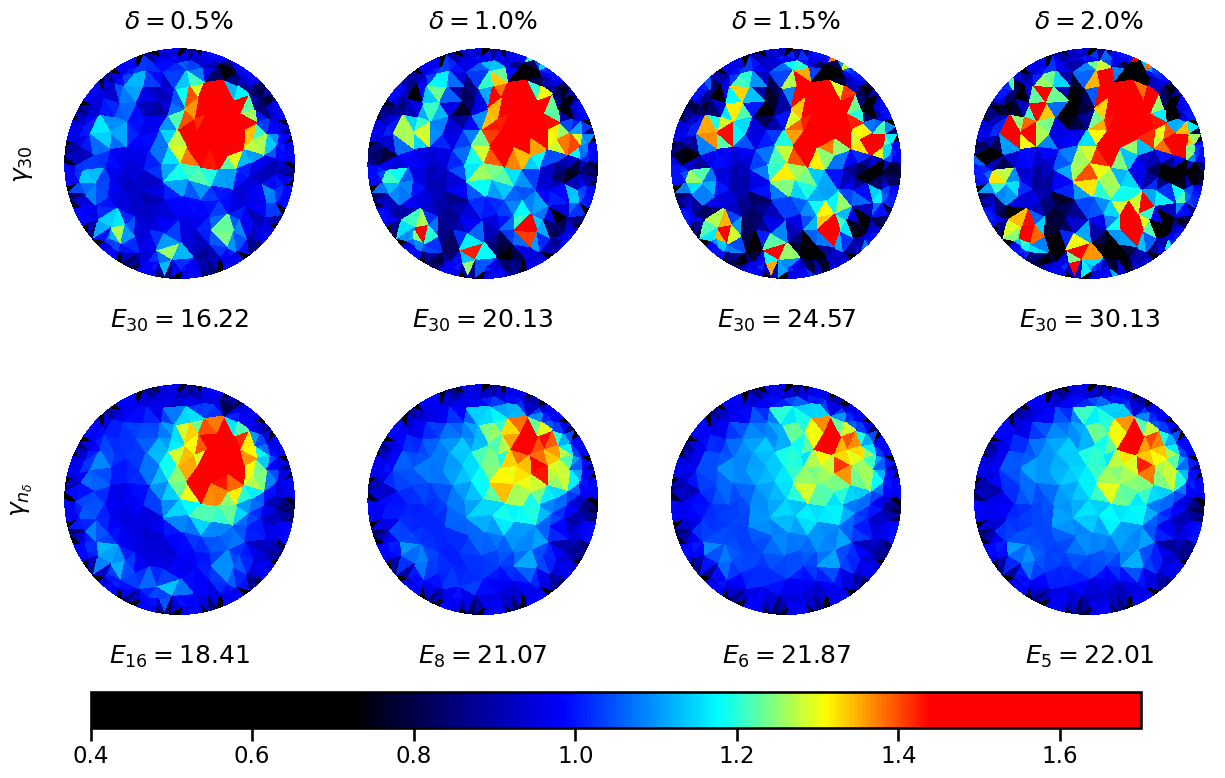

In [36]:
sns.set_context("talk")
fig=plt.figure(figsize=(15, 8))
sub_len=4

#newton_error=error
Q_DG=FunctionSpace(mesh_inverse,'DG',0)
i=1
disc_index_list=[]

cmap = LinearSegmentedColormap.from_list('custom',
                                                    [(0, 'black'),
                                                     (0.5/2, 'black'),
                                                     (0.9/2, 'blue'),
                                                     (1.2/2, 'cyan'),
                                                     (1.4/2, 'yellow'),
                                                     (1.6/2, 'red'),
                                                     (1, 'red')], N=256)

for key, experiment in dataDict.items():   
    tau=1.05
    noise_level=experiment["noise_level"]
    disc_index=np.argmax(experiment["res_vec"]<tau*noise_level*100)
    disc_index_list.append(disc_index)

    for index in [-1, disc_index]:
        gamma_k=Function(Q_DG)
        gamma_k.vector()[:]=experiment["gamma_k"][index]
        print(np.max(gamma_k.vector()[:]))
        
        if index==-1: j=0
        else: j=4

        plt.subplot(2,4,i+j);
        p=plot(gamma_k);
        p.set_cmap(cmap)    
        p.set_clim(0.4,1.7)
        plt.xticks([])
        plt.yticks([])
        plt.box(False)


        if index==-1:
            plt.title(key)
            error = np.round(experiment["error_vec"][-1],2)
            plt.xlabel("$E_{}={}$".format("{30}",error))
        else:
            error =  np.round(experiment["error_vec"][disc_index],2)
            #print(experiment["res_vec"][disc_index]*tau)
            plt.xlabel("$E_{}={}$".format("{"+str(disc_index)+"}",error))

        if i==1 and j==0: plt.ylabel("$\gamma_{"+"30}$")
        if i==1 and j==4: plt.ylabel("$\gamma_{"+"n_\delta}$")
    #if i==7+sub_len: plt.ylabel("Method 3")
    #plt.title(legend[i-1])
    
    i+=1

#fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.15, 0.00, 0.70, 0.015*3])
fig.colorbar(p, cax=cbar_ax, orientation="horizontal", )
#fig.suptitle('Newton (Landweber)', fontsize=16)

fig.savefig('figures/{}/2DSolutions_exp2.png'.format(exp_name), bbox_inches='tight', transparent=True, format='png')
plt.show()   

In [9]:
import pandas as pd
exps_names=list(dataDict.keys())
times=[np.round(dataDict[key]["time"],0) for key in dataDict.keys()]
errors=[np.round(dataDict[key]["error_vec"][disc_index_list[i]],2) for i, key in enumerate(dataDict.keys())]
res=[np.round(dataDict[key]["res_vec"][disc_index_list[i]],2) for i, key in enumerate(dataDict.keys())]
df = pd.DataFrame([disc_index_list, res, errors])
df.index = ['$n_\delta$', "$res_{n_\delta}$", "$E_{n_\delta}$"]
print(df.to_latex(index=True,
                  header =exps_names,
                  column_format = "lcccc",
                  escape=False))

\begin{tabular}{lcccc}
\toprule
{} & $\delta=0.5\%$ & $\delta=1.0\%$ & $\delta=1.5\%$ & $\delta=2.0\%$ \\
\midrule
$n_\delta$       &          16.00 &           8.00 &           6.00 &           5.00 \\
$res_{n_\delta}$ &           0.52 &           1.04 &           1.54 &           1.98 \\
$E_{n_\delta}$   &          18.41 &          21.07 &          21.87 &          22.01 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_248/1927423819.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=True,
